In [1]:
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [2]:
session = fastf1.get_session(2023, "hungary", 'R')
session.load(telemetry=False, weather=False)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\gakro\AppData\Local\Temp\fastf1.
	Size: 1.79 GB
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']


In [3]:
def plot_position_by_lap(session, session_name):
    fig, ax = plt.subplots(figsize=(8.0, 4.9))

    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)

        abb = drv_laps['Driver'].iloc[0]
        color = fastf1.plotting.driver_color(abb)

        ax.plot(drv_laps['LapNumber'], drv_laps['Position'], label=abb, color=color)
        
    ax.set_ylim([20.5, 0.5])
    ax.set_yticks([1, 5, 10, 15, 20])
    ax.set_xlabel('Lap')
    ax.set_ylabel('Position')

    plt.legend(bbox_to_anchor=(1.0, 1.02))

    fig.set_facecolor("black")

    mpl.rc('text', color='white')
    mpl.rc('axes', labelcolor='white')
    mpl.rc('xtick', color='white')
    mpl.rc('ytick', color='white')

    plt.suptitle(f"Position lap by lap \n "f"{session.event['EventName']} {session.event.year} {session_name}")
    plt.tight_layout()
    plt.show()

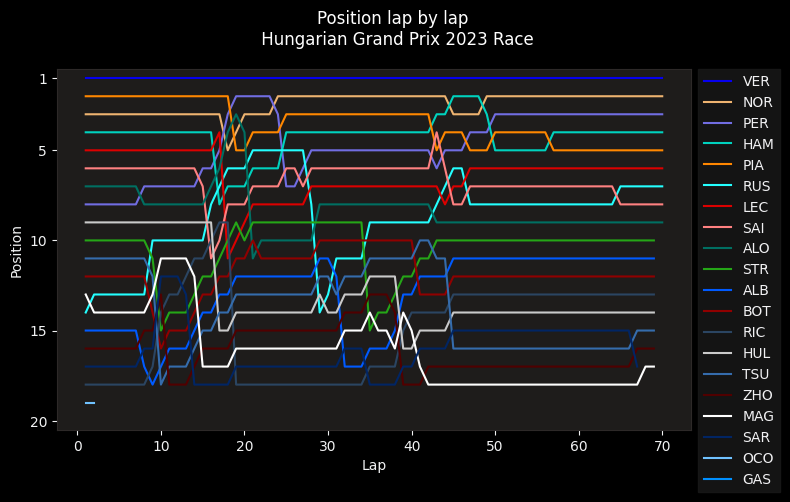

In [4]:
plot_position_by_lap(session, "Race")